# Assignment 3
### Akshay Anand (EE16B046)

Libraries that are used are declared.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import lstsq
import math
from scipy.integrate import quad

The various function that are used throughout the code are declared

In [8]:
def f1(x):
    return np.exp(x)

In [9]:
def uf1(x, k):
    return np.exp(x)*np.cos(k*x)

def vf1(x, k):
    return np.exp(x)*np.sin(k*x)

In [10]:
def f2(x):
    return np.cos(np.cos(x))

In [11]:
def uf2(x, k):
    return np.cos(np.cos(x))*np.cos(k*x)

def vf2(x, k):
    return np.cos(np.cos(x))*np.sin(k*x)

The function $\exp(x)$ is plotted.

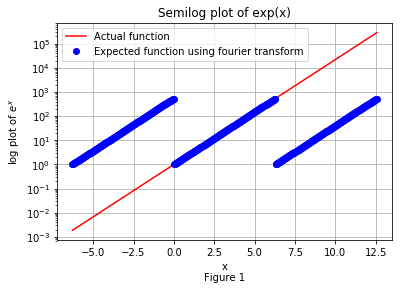

In [12]:
x = np.linspace(-2*math.pi, 4*math.pi, 600)
x2 = np.linspace(0, 2*math.pi, 200)
ft = f1(x2)
exp = np.concatenate((ft,ft,ft))
plt.semilogy(x, f1(x),'r')    # exp(x) is plotted in a semilog axis.
plt.semilogy(x, exp,'bo')
plt.title('Semilog plot of exp(x)')
plt.xlabel('x\nFigure 1')
plt.ylabel('log plot of $e^{x}$')
plt.legend(('Actual function', 'Expected function using fourier transform'))
plt.grid()
plt.show()

The function $\cos(\cos(x))$ is plotted.

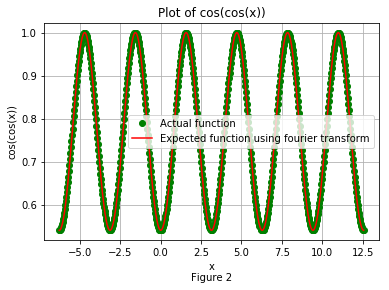

In [13]:
ft = f2(x2)
exp = np.concatenate((ft,ft,ft))
plt.plot(x, exp, 'go')
plt.plot(x, f2(x), 'r') # cos(cos(x)) is plotted in a linear axis.
plt.title('Plot of cos(cos(x))')
plt.xlabel('x\nFigure 2')
plt.ylabel('cos(cos(x))')
plt.legend(('Actual function', 'Expected function using fourier transform'))
plt.grid()
plt.show()

The fourier coefficients of $\exp(x)$ is found out.

In [14]:
n = np.arange(1,52)
f1Coeff = []   #List of all the coefficients for f1
af1 = []       #List of only an of f1
bf1 = []       #List of only bn of f1
f1Coeff.append(quad(f1, 0, 2*math.pi)[0] / (2*math.pi))            #Calculate a0 for f1
af1.append(f1Coeff[0])
for k in range(1,26):
    f1Coeff.append(quad(uf1, 0, 2*math.pi, args = (k))[0] / (math.pi)) #Calculate an for f1
    af1.append(quad(uf1, 0, 2*math.pi, args = (k))[0] / (math.pi))
    f1Coeff.append(quad(vf1, 0, 2*math.pi, args = (k))[0] / (math.pi)) #Calculate bn for f1
    bf1.append(quad(vf1, 0, 2*math.pi, args = (k))[0] / (math.pi))

In [15]:
f2Coeff = []   #List of all the coefficients for f2
af2 = []       #List of only an of f2
bf2 = []       #List of only bn of f2
f2Coeff.append(quad(f2, 0, 2*math.pi)[0] / (2*math.pi))            #Calculate a0 for f2
af2.append(f2Coeff[0])
for k in range(1,26):
    f2Coeff.append(quad(uf2, 0, 2*math.pi, args = (k))[0] / (math.pi)) #Calculate an for f2
    af2.append(quad(uf2, 0, 2*math.pi, args = (k))[0] / (math.pi))
    f2Coeff.append(quad(vf2, 0, 2*math.pi, args = (k))[0] / (math.pi)) #Calculate bn for f2
    bf2.append(quad(vf2, 0, 2*math.pi, args = (k))[0] / (math.pi))

The coefficients obtained above for both functions are plotted in both loglog and semilog axes.

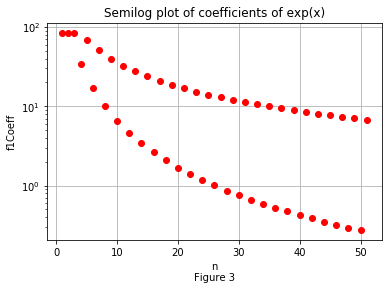

In [16]:
plt.semilogy(n, np.absolute(f1Coeff), 'ro')
plt.title('Semilog plot of coefficients of exp(x)')
plt.xlabel('n\nFigure 3')
plt.ylabel('f1Coeff')
plt.grid()
plt.show()

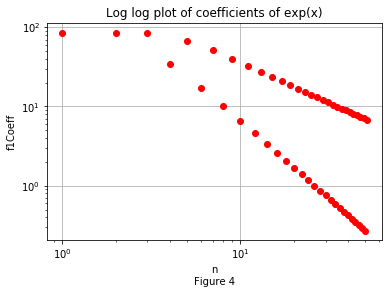

In [17]:
plt.loglog(n, np.absolute(f1Coeff), 'ro')
plt.title('Log log plot of coefficients of exp(x)')
plt.xlabel('n\nFigure 4')
plt.ylabel('f1Coeff')
plt.grid()
plt.show()

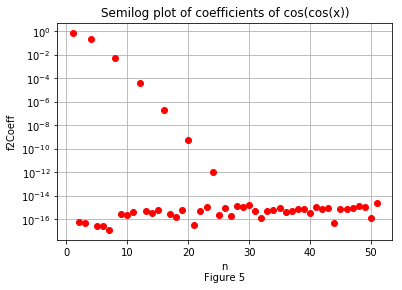

In [18]:
plt.semilogy(n, np.absolute(f2Coeff), 'ro')
plt.title('Semilog plot of coefficients of cos(cos(x))')
plt.xlabel('n\nFigure 5')
plt.ylabel('f2Coeff')
plt.grid()
plt.show()

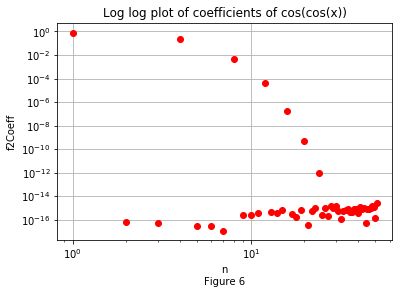

In [19]:
plt.loglog(n, np.absolute(f2Coeff), 'ro')
plt.title('Log log plot of coefficients of cos(cos(x))')
plt.xlabel('n\nFigure 6')
plt.ylabel('f2Coeff')
plt.grid()
plt.show()

The value of the coefficients are now estimated using least square approximation using first 51 terms of the full fourier series expansion of the function.

In [20]:
x=np.linspace(0,2*math.pi,401)   # vector x is initialised
x=x[:-1]
b1=f1(x)  # b1 is used to store actual value of f1 at all points in x
b2=f2(x)  # b2 is used to store actual value of f2 at all points in x
A=np.zeros((400,51)) # The 2D matrix is initialised and assigned values in the following lines
A[:,0]=1
for k in range(1,26):
    A[:,2*k-1]=np.cos(k*x)
    A[:,2*k]=np.sin(k*x)
c1=lstsq(A,b1)[0]   # The coefficients of f1 is estimated using lstsq
c2=lstsq(A,b2)[0]   # The coefficients of f2 is estimated using lstsq

The maximum error between the coefficients obtained using integration method and least square method is found out.

In [21]:
print ("The maximum deviation between coefficients are -")
print ("exp(x) :", max(np.absolute(c1-f1Coeff)))
print ("cos(cos(x)) :", max(np.absolute(c2-f2Coeff)))

The maximum deviation between coefficients are -
exp(x) : 1.33273087034
cos(cos(x)) : 2.57586713575e-15


Now, the coefficients obtained using both ways are plotted in a single plot for both the functions in a loglog and semilog plot.

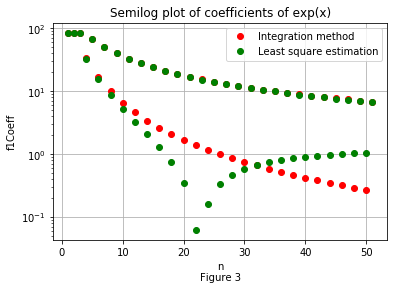

In [22]:
plt.semilogy(n, np.absolute(f1Coeff), 'ro')
plt.semilogy(n, np.absolute(c1), 'go')
plt.title('Semilog plot of coefficients of exp(x)')
plt.legend(('Integration method', 'Least square estimation'))
plt.xlabel('n\nFigure 3')
plt.ylabel('f1Coeff')
plt.grid()
plt.show()

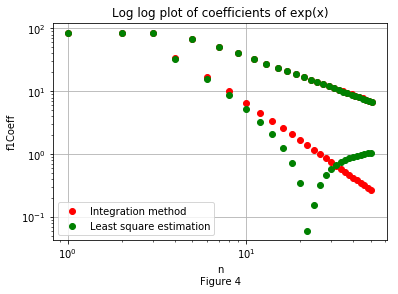

In [23]:
plt.loglog(n, np.absolute(f1Coeff), 'ro')
plt.loglog(n, np.absolute(c1), 'go')
plt.title('Log log plot of coefficients of exp(x)')
plt.legend(('Integration method', 'Least square estimation'))
plt.xlabel('n\nFigure 4')
plt.ylabel('f1Coeff')
plt.grid()
plt.show()

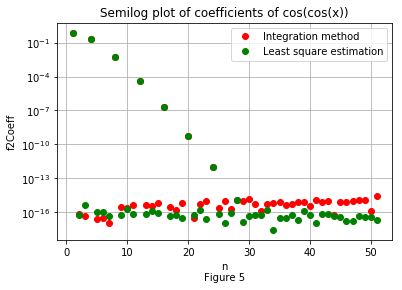

In [24]:
plt.semilogy(n, np.absolute(f2Coeff), 'ro')
plt.semilogy(n, np.absolute(c2), 'go')
plt.title('Semilog plot of coefficients of cos(cos(x))')
plt.legend(('Integration method', 'Least square estimation'))
plt.xlabel('n\nFigure 5')
plt.ylabel('f2Coeff')
plt.grid()
plt.show()

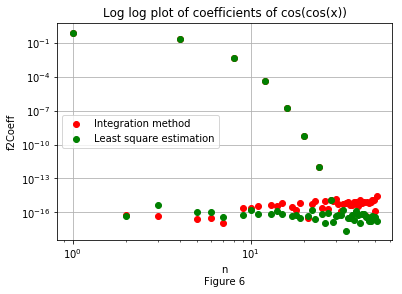

In [25]:
plt.loglog(n, np.absolute(f2Coeff), 'ro')
plt.loglog(n, np.absolute(c2), 'go')
plt.title('Log log plot of coefficients of cos(cos(x))')
plt.legend(('Integration method', 'Least square estimation'))
plt.xlabel('n\nFigure 6')
plt.ylabel('f2Coeff')
plt.grid()
plt.show()

The values of the function at the points in the interval $[0,2\pi)$ are now found out using both the actual function definitions and by the first 51 terms of the fourier series (26 $\cos$ coefficients and 25 $\sin$ coefficients). Both these are plotted in the same graph.

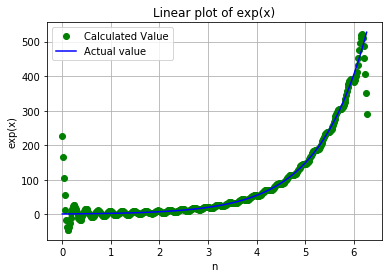

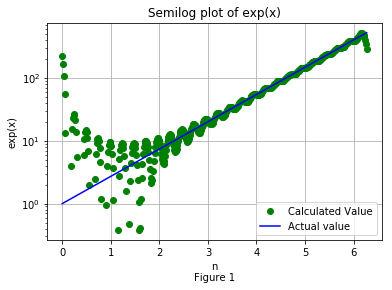

In [26]:
plt.plot(x, np.matmul(A,c1), 'go')
plt.plot(x, f1(x), 'b')
plt.title('Linear plot of exp(x)')
plt.legend(('Calculated Value', 'Actual value'))
plt.xlabel('n')
plt.ylabel('exp(x)')
plt.grid()
plt.show()   # Compares the linear plot of exp(x)

plt.semilogy(x, np.matmul(A,c1), 'go')
plt.semilogy(x, f1(x), 'b')
plt.title('Semilog plot of exp(x)')
plt.legend(('Calculated Value', 'Actual value'))
plt.xlabel('n\nFigure 1')
plt.ylabel('exp(x)')
plt.grid()
plt.show()  # Compares the semilog plot of exp(x)

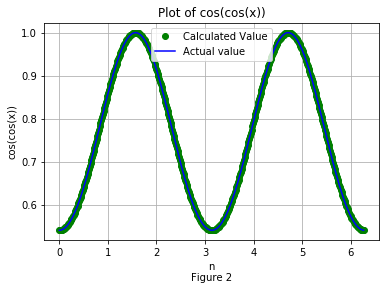

In [27]:
plt.plot(x, np.matmul(A,c2), 'go')
plt.plot(x, f2(x), 'b')
plt.title('Plot of cos(cos(x))')
plt.legend(('Calculated Value', 'Actual value'))
plt.xlabel('n\nFigure 2')
plt.ylabel('cos(cos(x))')
plt.grid()
plt.show()